<a href="https://colab.research.google.com/github/ravin235/arima/blob/main/StageC_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/ravin235/groupc-quiz/main/Data_for_UCI_named.csv')

In [2]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df = data.copy()

In [4]:
df.drop(columns='stab',inplace=True)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
label_encoder = LabelEncoder()
X = df.drop(columns='stabf')
y = label_encoder.fit_transform(df['stabf'])
y

array([1, 0, 1, ..., 0, 1, 1])

In [45]:
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [7]:
normalised_x_train = scaler.fit_transform(x_train)
normalised_x_test = scaler.fit_transform(x_test)

In [8]:
from sklearn.ensemble import (RandomForestClassifier,
                              ExtraTreesClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [9]:
#classifiers
rfc = RandomForestClassifier(random_state=1)
xtc = ExtraTreesClassifier(random_state=1)
xgbc = XGBClassifier(random_state=1)
lgbmc = LGBMClassifier(random_state=1)


In [10]:
rfc.fit(normalised_x_train,y_train)
xtc.fit(normalised_x_train,y_train)
xgbc.fit(normalised_x_train, y_train)
lgbmc.fit(normalised_x_train, y_train)

LGBMClassifier(random_state=1)

# Cross Validation and Accuracy

In [28]:
data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [11]:
 from sklearn.model_selection import cross_val_score
 scores = cross_val_score(rfc, normalised_x_train, y_train, cv=5, scoring='f1_macro')
 scores

array([0.91143756, 0.91136454, 0.91564855, 0.90214725, 0.91555674])

In [27]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores = []#run for every split
for train_index, test_index in skf.split(normalised_x_train, y_train):
  x_train, x_test = np.array(normalised_x_train)[train_index],np.array(normalised_x_train)[test_index]            
  y_train, y_test = y_train[train_index], [test_index]

model = rfc.fit(x_train, y_train)
#save result to list
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label=1))

NameError: ignored

# Confusion Matrix

In [12]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix

In [17]:
new_predictions = rfc.predict(normalised_x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[1, 0])
cnf_mat

array([[1232,   56],
       [  88,  624]])

In [31]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy), 4))

Accuracy: 1


In [20]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('Precision: {}'.format(round(precision*100), 2))

Precision: 93


In [21]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label=0)
print('Recall: {}'.format(round(recall*100), 2))

Recall: 88


In [24]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('F1: {}'.format(round(f1*100), 2))

F1: 94


In [33]:
xgbc_pred = xgbc.predict(normalised_x_test)
xgbc_accuracy = accuracy_score(y_true=y_test, y_pred = xgbc_pred)
xgbc_accuracy


0.946

In [34]:
lgbmc_pred = lgbmc.predict(normalised_x_test)
lgbmc_accuracy = accuracy_score(y_true=y_test, y_pred = lgbmc_pred)
lgbmc_accuracy

0.9355

In [ ]:
params = {
    "n_estimators": [100, 300, 500, 1000],
    "criterion": ["gini", "entropy"],
    "min_samples_split":[]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train, y_train)
print("Best hyperparameter:", grid.best_params_)

In [36]:
from sklearn.model_selection import RandomizedSearchCV

rnd_search = RandomizedSearchCV(xtc, scoring = 'accuracy', n_jobs = -1, verbose=1,n_iter =10, cv=5, random_state=1)
rnd_search.fit(normalised_x_train,y_train)
rnd_search.best_params_
rnd_search.best_score_

TypeError: ignored

In [40]:
len(data.columns)

14

In [46]:
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


[0.11870096 0.11866964 0.11529766 0.11768899 0.03819717 0.03922227
 0.03985691 0.03955692 0.0894596  0.09326755 0.09783918 0.09224315]


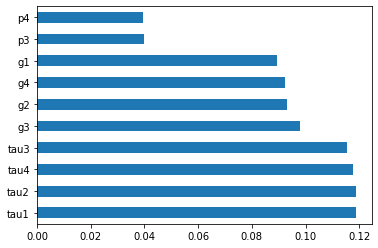

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()